In [2]:
import pandas as pd
import datetime
import time
import numpy as np
from fbprophet import Prophet
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima_model import ARIMA
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [17]:
#https://finance.yahoo.com/quote/AMZN/history/

<b> Read data </b>

In [3]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [4]:
amzn_dataset=pd.read_csv("AMZN.csv",header=0,parse_dates=[0],date_parser=parser)
#amzn_dataset=amzn_dataset.set_index('Date')

In [9]:
#split data into train and training set

train_data, test_data = amzn_dataset[0:int(len(amzn_dataset)*0.82)], amzn_dataset[int(len(amzn_dataset)*0.82):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

<b> Build ARIMA Model </b>

In [10]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

<b> Evaluate ARIMA Model </b> 

In [11]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

MAPE_error = MAPE(test_data, model_predictions)
print('Testing Mean Absolute Error is {}'.format(MAPE_error))

Testing Mean Absolute Error is 30.282109311882866


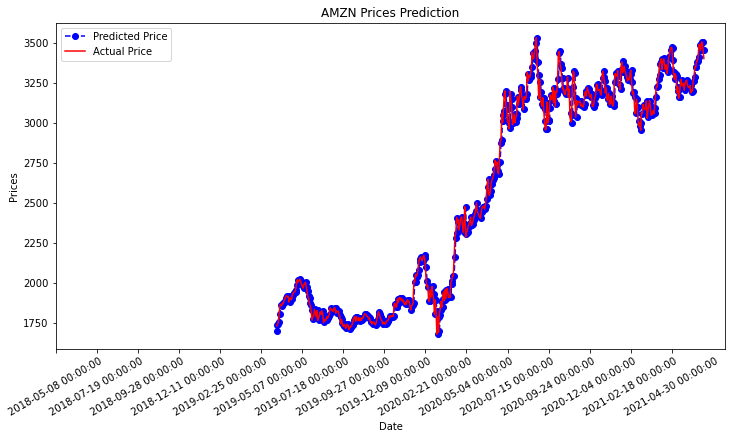

In [13]:
plt.figure(figsize=(12,6))
test_set_range =amzn_dataset[int(len(amzn_dataset)*0.82):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('AMZN Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(2100,2890,50), amzn_dataset.Date[2100:2890:50],rotation=30)
plt.legend()
plt.show()